
# The Main Steps
1. Import an image
2. Prepare image for segmentation (grayscale, threshold, ... etc.)
3. Perform segmentation and find contours
4. Draw contours on new image
5. extract individual contours.


In [1]:
### IMPORTS
%matplotlib notebook

import ipywidgets as widgets
from IPython.display import display
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
# from tools.my_widgets import slider_setup

In [2]:
# All the Widgets
cvt_color_dict = {
    'BGR2RGB': cv2.COLOR_BGR2RGB,
    'BGR2GRAY': cv2.COLOR_BGR2GRAY,
    'BGR2HSV': cv2.COLOR_BGR2HSV}

mode_select = widgets.ToggleButtons(
    options=cvt_color_dict.keys(),
    description='Color Mode',
    button_style='',
    value='BGR2GRAY',
)

range_slider = widgets.IntRangeSlider(
        value=[230, 255],
        min=0, max=255,
        step=1,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='d',
        description='Range')

int_slider = widgets.IntSlider(
        value=3,
        min=1, max=15,
        step=2,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='d',
        description='Blur')

In [3]:
# STEP 1 Import the image
puzzle = 'images/puzzle.png'
img = cv2.imread(puzzle) # Choose your puzzle file
widgets.Image(value=open(puzzle, 'rb').read(), format='png')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x01\x00\x00\x01\xa9\x08\x02\x00\x00\x00\x9b#r(\x…

ToggleButtons(description='Color Mode', index=1, options=('BGR2RGB', 'BGR2GRAY', 'BGR2HSV'), value='BGR2GRAY')

<IPython.core.display.Javascript object>


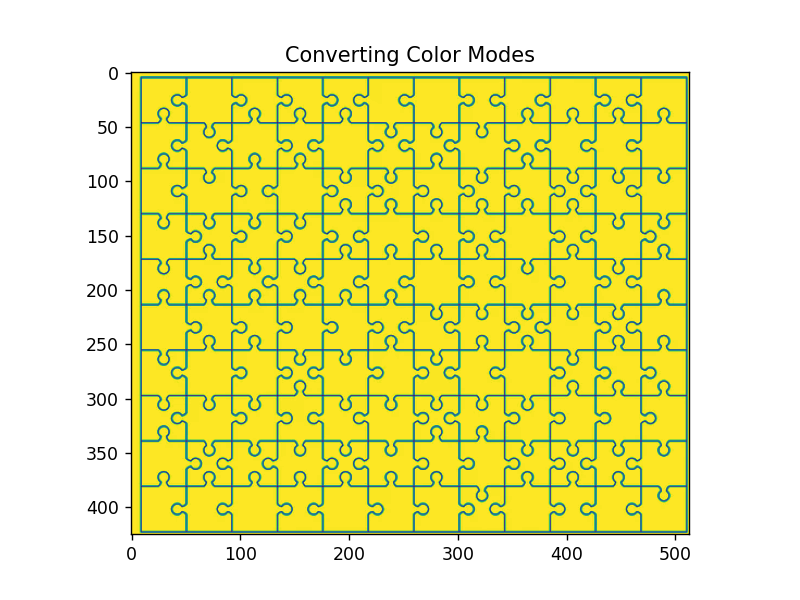

In [4]:
# STEP 2 Modulate Image for segmentation

#2.1 - Change Color Modes
display(mode_select)
mode = cvt_color_dict['BGR2GRAY']

img_disp = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))
plt.title('Converting Color Modes')

def colour_mode(sender):
    img_disp.set_data(cv2.cvtColor(img, cvt_color_dict[mode_select.value]))
    plt.show()

mode_select.on_widget_constructed(colour_mode)
mode_select.observe(colour_mode)

IntRangeSlider(value=(230, 255), description='Range', max=255)

<IPython.core.display.Javascript object>


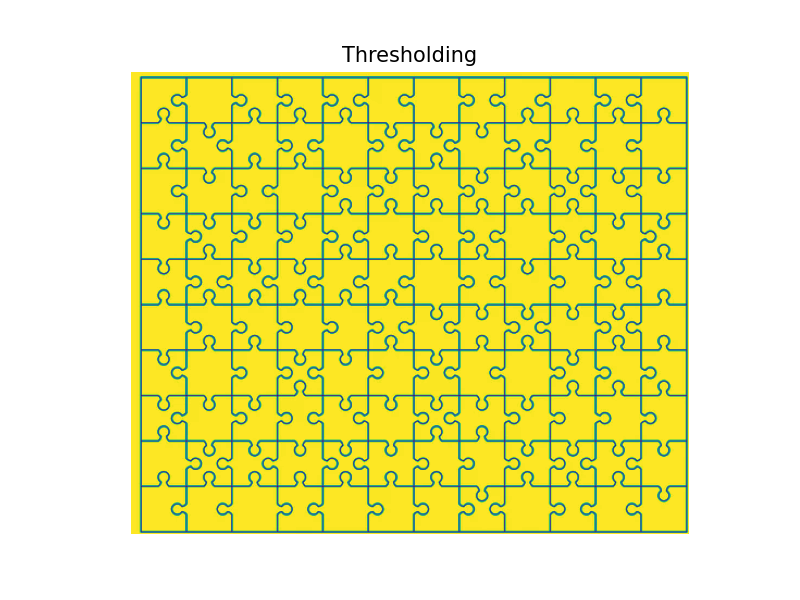

In [5]:
# STEP 2.2 Binary Thresholding the image to get the appropriate data
display(range_slider)

plt.figure(2)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_disp2 = plt.imshow(img)
plt.axis('off'), plt.title('Thresholding')

def range_modifier(sender2):
    _ = range_slider.value
    #img_disp2.set_data(cv2.inRange(img, _[0], _[1]))
    img_disp2.set_data(cv2.threshold(img, _[0], _[1], cv2.THRESH_BINARY)[1])
    plt.show()

range_slider.observe(range_modifier)

IntSlider(value=3, description='Blur', max=15, min=1, step=2)

<IPython.core.display.Javascript object>


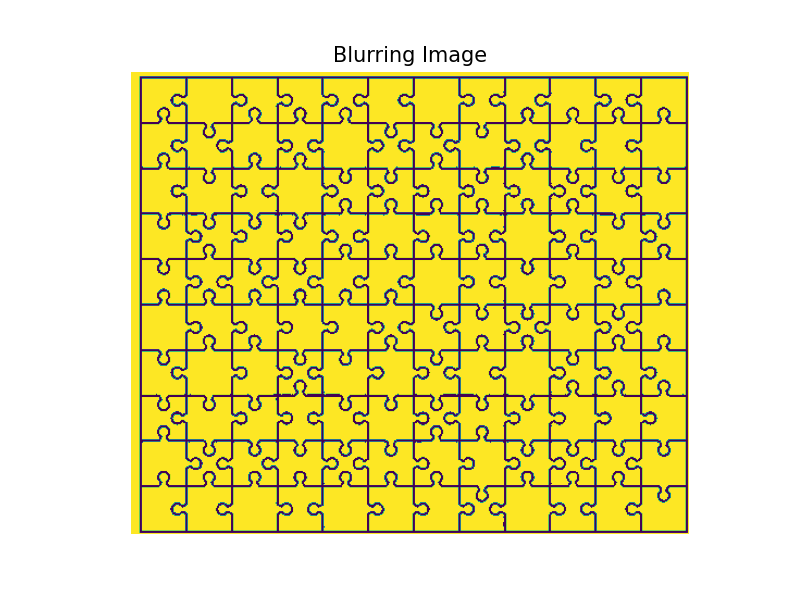

In [6]:
# STEP 2.3 Blur the image to generate appropriate data
display(int_slider)

plt.figure(3)
_ = range_slider.value
img = cv2.inRange(img, _[0], _[1])
img_disp3 = plt.imshow(img)
plt.axis('off'), plt.title('Blurring Image')

def blur_modifier(sender3):
    _ = int_slider.value
    img_disp3.set_data(cv2.GaussianBlur(img, (_, _), 0))
    plt.show()

int_slider.observe(blur_modifier)

(46,)


<IPython.core.display.Javascript object>


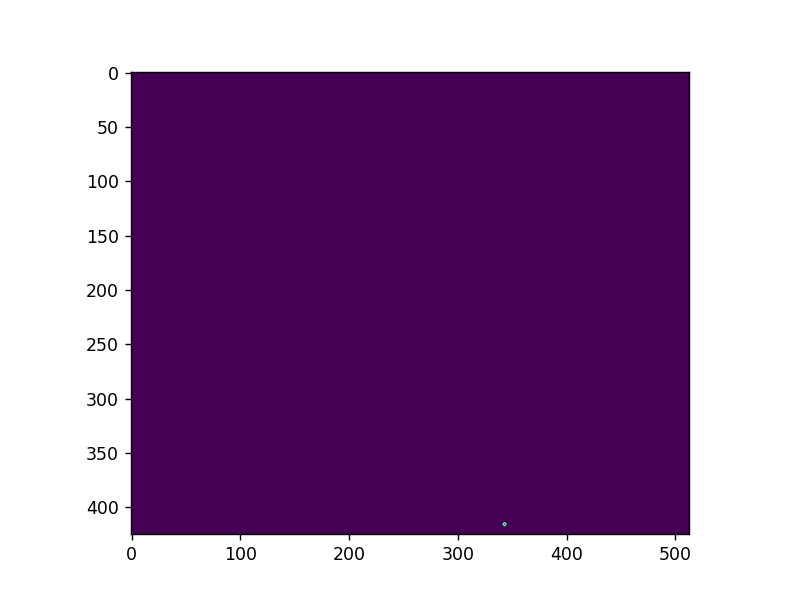

In [7]:
# 3 Generate Contours
img = cv2.GaussianBlur(img, (int_slider.value, int_slider.value), 0)

contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

print(np.array(contours, dtype=object).shape)

plt.figure(4)
c_img = np.zeros_like(img)
d_img = cv2.drawContours(image=c_img, contours=contours, contourIdx=1, color=(255, 255, 0), thickness=1, lineType=cv2.LINE_AA)
plt.imshow(c_img)